# Aim  
## To develop an algorithm that predicts the number of wins for a given team in the 2015 season, based on several different indicators of success. 

#### This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

### Input features: 

#### Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

'R'-- Runs  
'AB'-- At Bats  
'H'-- Hits   
'2B'-- Doubles  
'3B'-- Triples   
'HR'-- Homeruns  
'BB'-- Walks  
'SO'- Strikeouts   
'SB'-- Stolen Bases  
'RA'-- Runs Allowed  
'ER'-- Earned Runs   
'ERA'-- Earned Run Average(ERA)  
'SHO'-- Shutout  
'SV'-- Save   
'CG'-- Complete Games   
'E'-- Errors 

### Output: Number of predicted wins (W)

#### Lets import required libraray.

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#### Loading Data.

In [2]:
data=pd.read_csv('baseball.csv')

In [3]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
data.shape

(30, 17)

Our data is having 30 Rows and 17 columns.  

Here our target column is W- No of wins  and other are the feature columns. 

All the data is integer type, only ERA is float value  

In data we have to predict the no of wins in 2015.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


 Here we can see 16 columns are int 64 and 1 column which is ERA-Earned run average is float-64.

 In all the columns 30 Non- Null values represent, data is not having any null values.

In [6]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

#### Checking Null Values.

In [7]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Data is not having any null values, we can proceed for further analysis.

<AxesSubplot:>

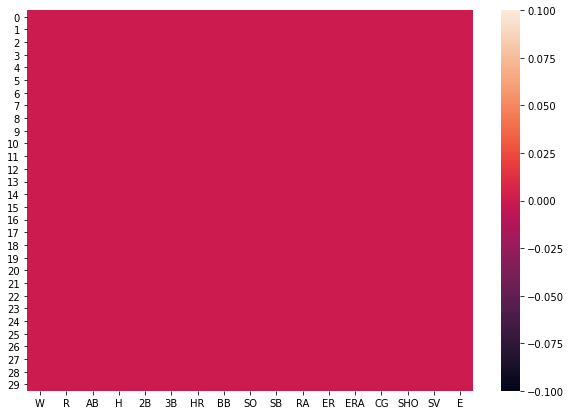

In [8]:
plt.figure(figsize= (10,7))
sns.heatmap(data.isnull())

#### Descriptive Statistics:

In [9]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### EDA 

### Univariate analysis

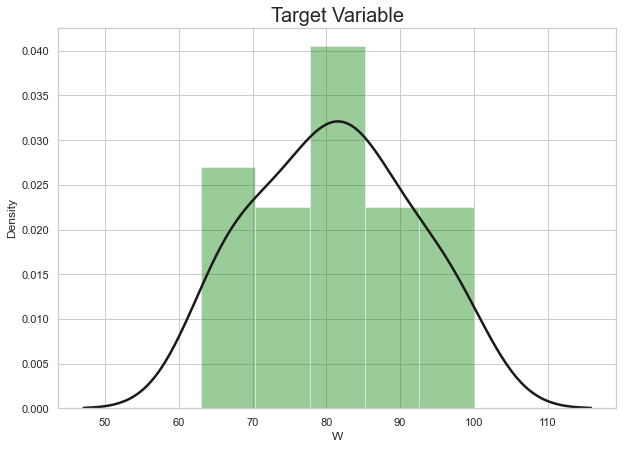

In [10]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['W'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

Here we can see number of win is distributed between 63 to 100,  
The density between 78 to 85 is max.  
Other havving almost equal density.

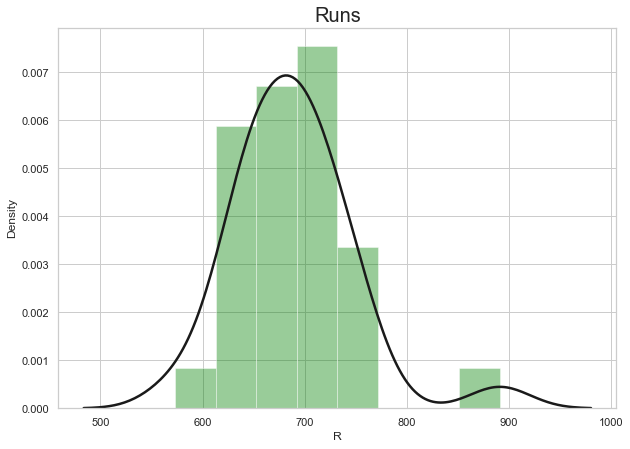

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['R'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Runs', fontsize=20)
plt.show()

Here Runs is defined as number of times a player crosses home plate.  
Here we can see most of the run scored are lying between 570 to 760 ,  
Maximum run scored is 891.

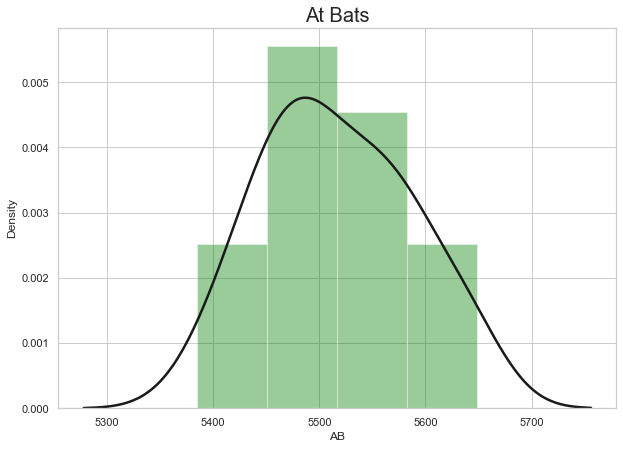

In [12]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['AB'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('At Bats', fontsize=20)
plt.show()

An official at-bat comes when a batter reaches base via a fielder's choice, hit or an error (not including catcher's interference) or when a batter is put out on a non-sacrifice.   
Here we can see the data is normaly distributed between 5390- 5660  
The maximum density lying between 5450- 5520 

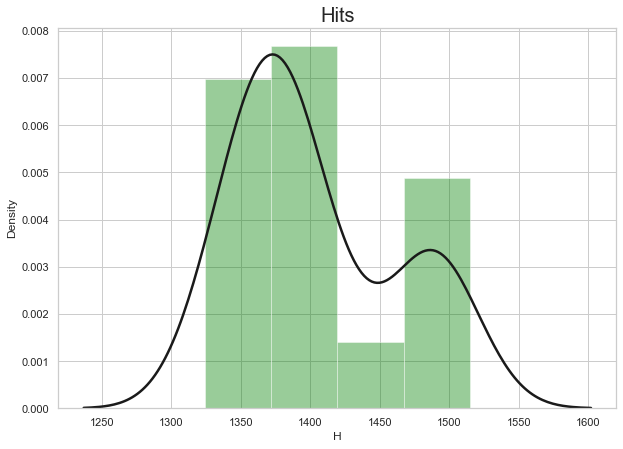

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['H'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Hits', fontsize=20)
plt.show()

A hit occurs when a batter strikes the baseball into fair territory and reaches base without doing so via an error or a fielder's choice.  
Here we can see maximum hits lying between 1500-1550.  
And minimum hits are lying between 1300-1350  
Maximum density we can observe between 1350- 1400.

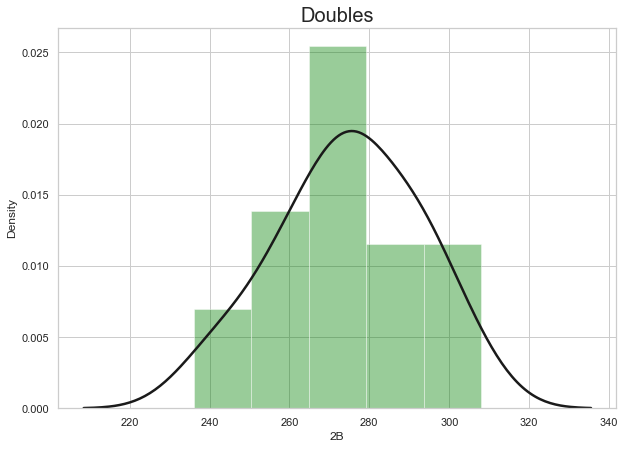

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['2B'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Doubles', fontsize=20)
plt.show()

A batter is credited with a double when he hits the ball into play and reaches second base without the help of an intervening error or attempt to put out another baserunner.  
Here we can see the double is having maximum density 260- 280.  
The minimum number of doubles score  is 236, and Maximun number of doubles are around 308  

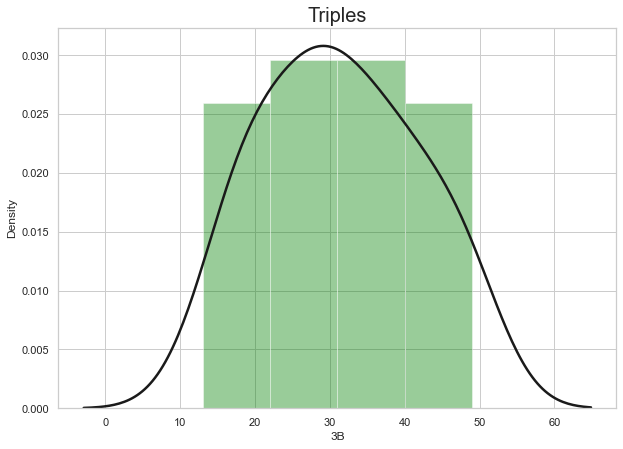

In [15]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['3B'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Triples', fontsize=20)
plt.show()

Often called "the most exciting play in baseball," a triple occurs when a batter hits the ball into play and reaches third base without the help of an intervening error or attempt to put out another baserunner.   
Here Number we can observe number of triple are less than the number of double.  
The numbers are distributed between 10 to 50. 
Min value is 13 and Maximum value is 49.  
Density is maximun between 20 to 40. 

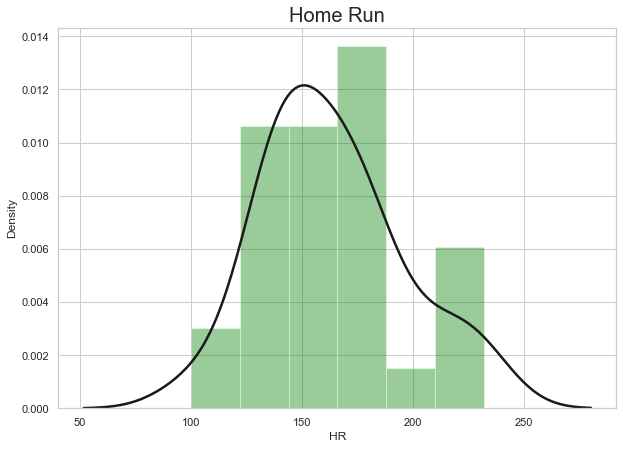

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['HR'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Home Run', fontsize=20)
plt.show()

A home run occurs when a batter hits a fair ball and scores on the play without being put out or without the benefit of an error.  
Here we can obeserve home runs are lying between 100 to 240.  
The maximum density lies between 150 to 200.
We can also oberve that number of Home Runs are greater than the Triple. 

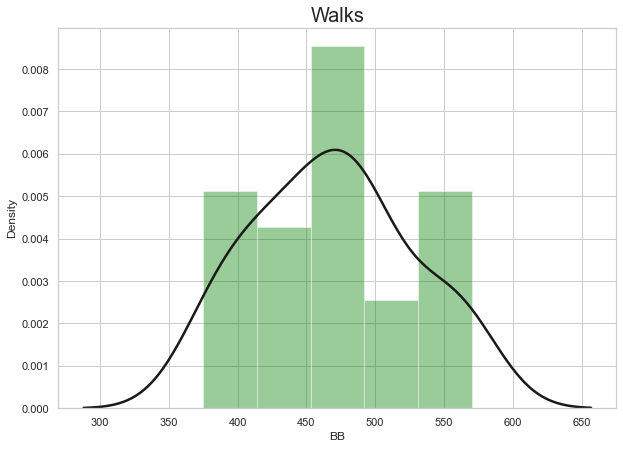

In [17]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['BB'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Walks', fontsize=20)
plt.show()

A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base. In the scorebook, a walk is denoted by the letters BB.  
Here we can see the numbers lying bewteen 375 to 570.  
And the maximun density is between 450 to 500.  

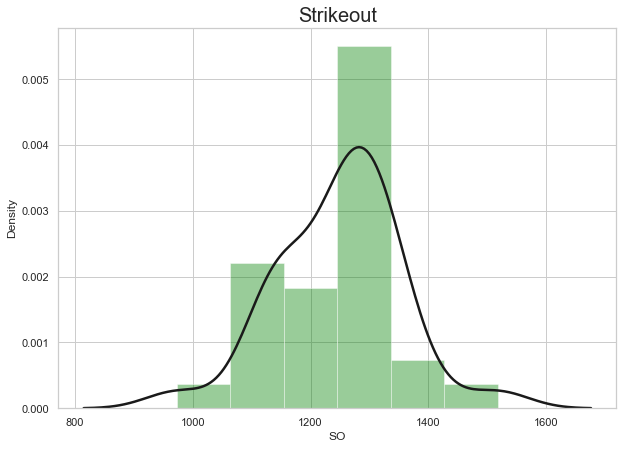

In [18]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['SO'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Strikeout', fontsize=20)
plt.show()

A strikeout occurs when a pitcher throws any combination of three swinging or looking strikes to a hitter. (A foul ball counts as a strike, but it cannot be the third and final strike of the at-bat. A foul tip, which is caught by the catcher, is considered a third strike.)  
Here the strike out lying between 973 to 1518.  
maximun density lying between 1220 to 1320.  

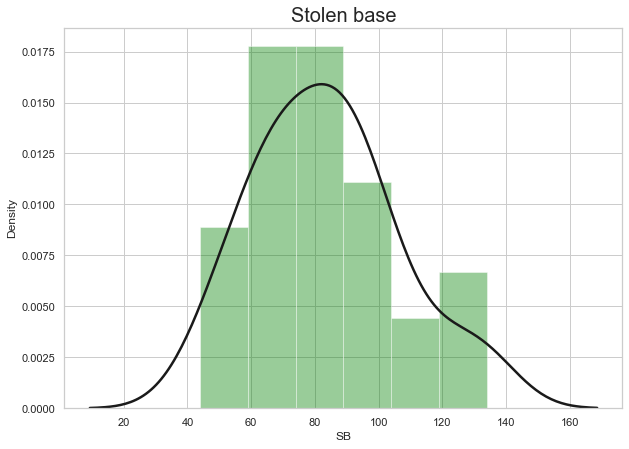

In [19]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['SB'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Stolen base', fontsize=20)
plt.show()

A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.  
The data is distributed between the 44 to 134.  
It is having maximum density between 60 to 90.


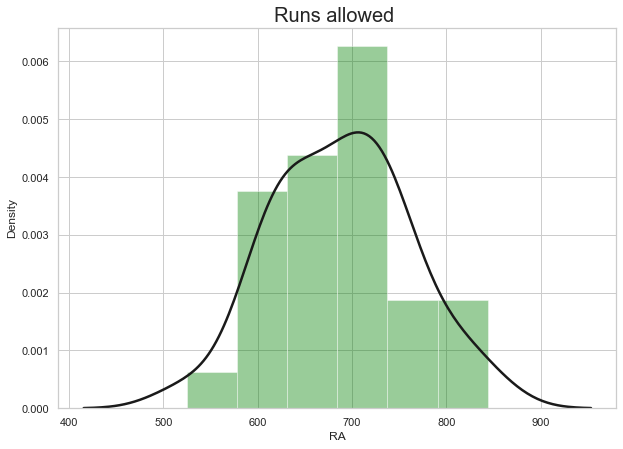

In [20]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['RA'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Runs allowed ', fontsize=20)
plt.show()

Runs allowed per nine innings pitche.  
The min number of runs allowed 525 and maximum number 844.  
Maximum density lying between 690- 740.  

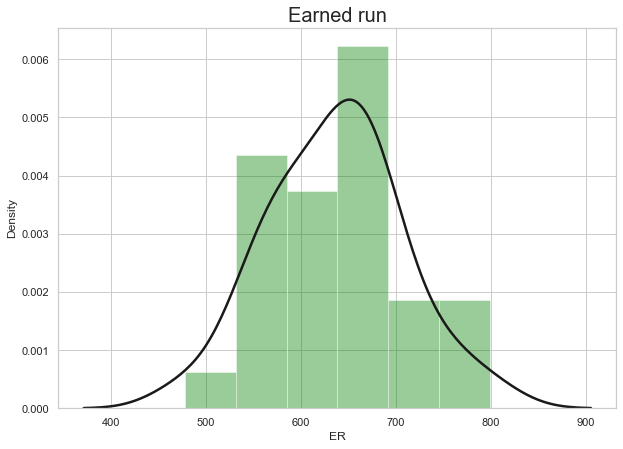

In [21]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['ER'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Earned run', fontsize=20)
plt.show()

An earned run is any run that scores against a pitcher without the benefit of an error or a passed ball.  
The numbers are distributed between 478 to 780.  
Maximum density lying between 640 to 700. 

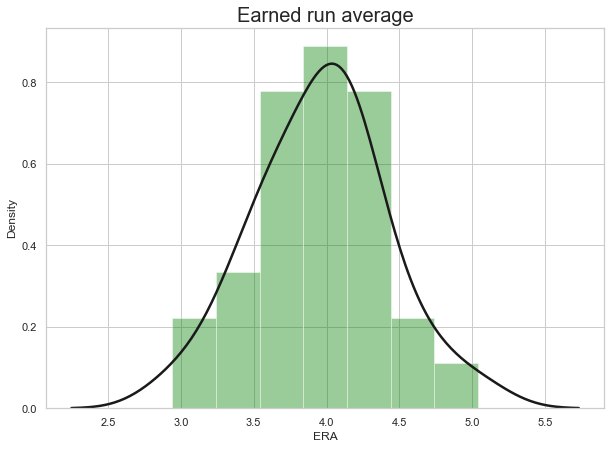

In [22]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['ERA'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Earned run average', fontsize=20)
plt.show()

Earned run average represents the number of earned runs a pitcher allows per nine innings -- with earned runs being any runs that scored without the aid of an error or a passed ball. ERA is the most commonly accepted statistical tool for evaluating pitchers.  
The data is normaly distrubuted between 3 to 5  
Max density we can see in between 3.5 to 4.5  

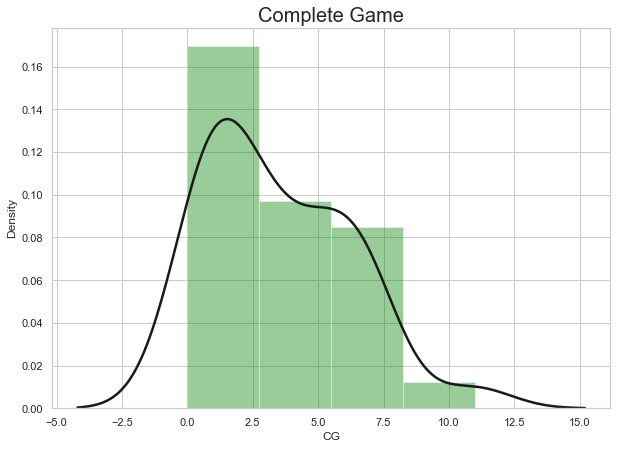

In [23]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['CG'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Complete Game', fontsize=20)
plt.show()

A pitcher earns a complete game if he pitches the entire game for his team regardless of how long it lasts. If the game is shortened by rain or if it lasts into extra innings, it counts as a complete game if the pitcher was the only pitcher to record an appearance for his team.  
Here we can see the values lying between 0 to nearly 11.  
Max density is between 0 to 2.5   
Here we can see complete game is vary less hapning event.

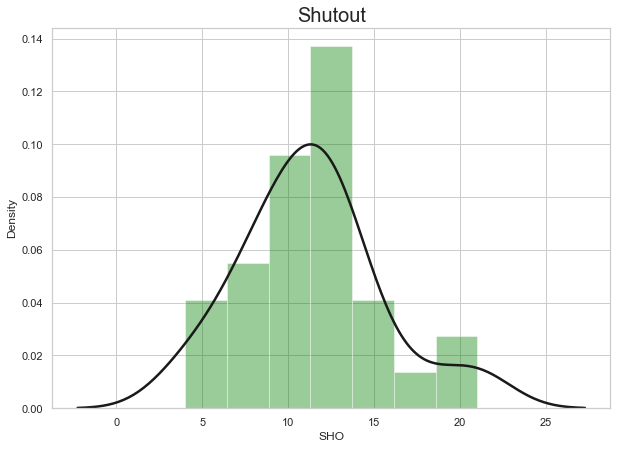

In [24]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['SHO'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Shutout', fontsize=20)
plt.show()

A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score.  
Here we can see the shutout numbers ranges between 4 to 21.  
Maximum density we can observe between 11 to 14. 
Data is nornally distributed.  

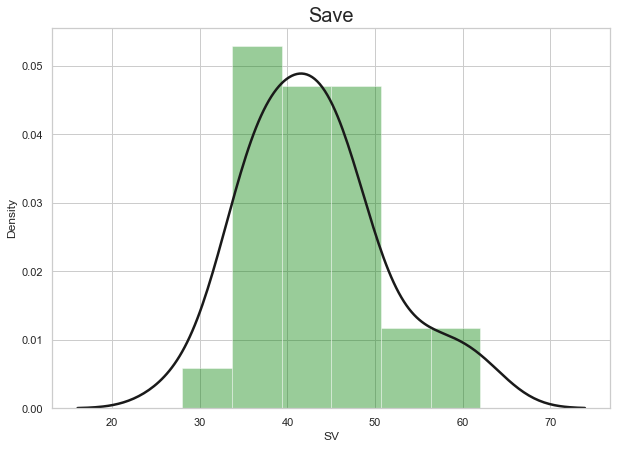

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['SV'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Save', fontsize=20)
plt.show()

A save is awarded to the relief pitcher who finishes a game for the winning team, under certain circumstances. A pitcher cannot receive a save and a win in the same game.  
The data is distributed between 28 to 62.  
Maximum density lies between 40 t0 50. 

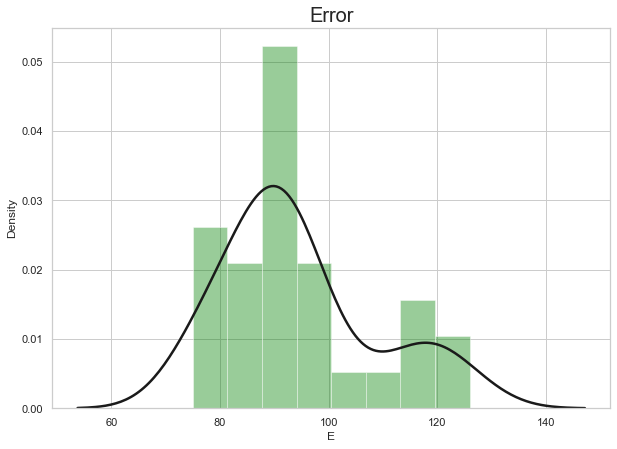

In [26]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(data['E'], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Error', fontsize=20)
plt.show()

A fielder is given an error if, in the judgment of the official scorer, he fails to convert an out on a play that an average fielder should have made.  
Data is distributed between 75 to 126.  
Maximun density lies between 85 to 95  

## Bivariate Aanlysis

Here Our Target column  is W- No of Predicted Wins.  
So we will plot all the colums against W. 


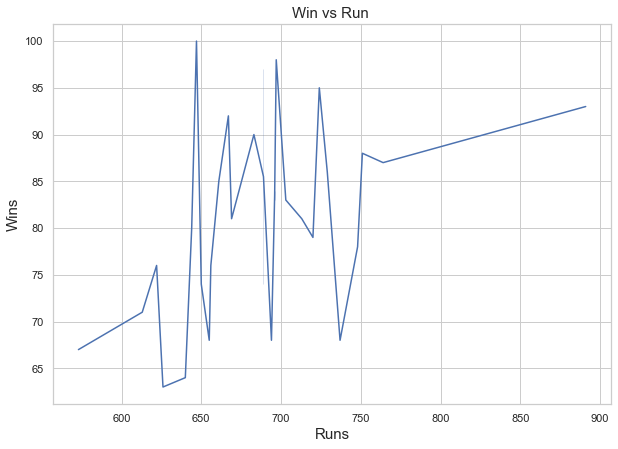

In [27]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='R', y='W')
plt.title('Win vs Run ', fontsize=15)
plt.xlabel('Runs', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

Here we can see the wins vs Runs Graphs is not purely  linear at every point.   
But at some points it is linear.  
Number of wins are higher at nearly 650 runs.  
Number of runs is good factor to predict the wins.

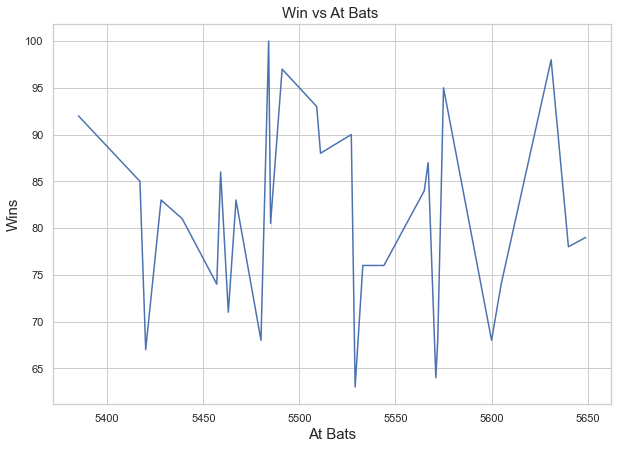

In [28]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='AB', y='W' )
plt.title('Win vs At Bats ', fontsize=15)
plt.xlabel('At Bats', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

We can observe that the raltion between wins and At bats is not linear  
It is having negative curved relationship.  

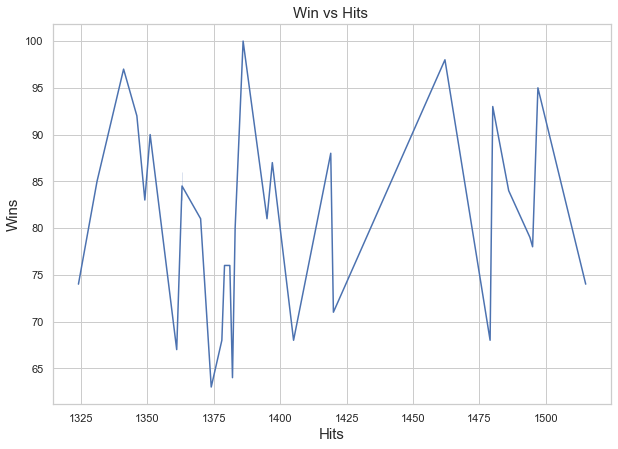

In [29]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='H', y='W')
plt.title('Win vs Hits ', fontsize=15)
plt.xlabel('Hits', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

From the graph we can see that tha graph is not having linear relationship.  
The max number of wins are between 1375 to 1400. 

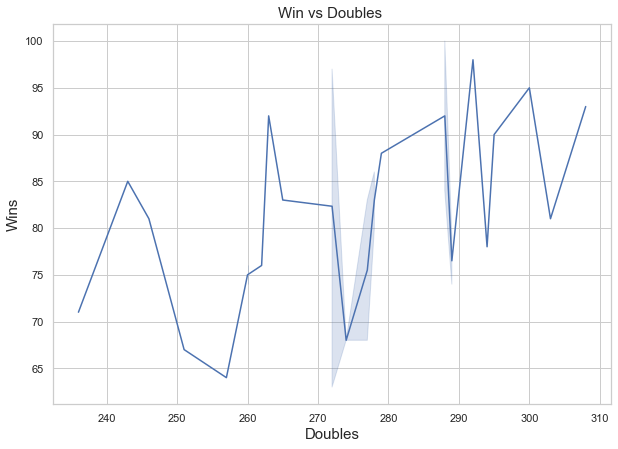

In [30]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='2B', y='W')
plt.title('Win vs Doubles ', fontsize=15)
plt.xlabel('Doubles', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

Here we can see graph is having positive relationship.  
with increase in Doubles number of wins also increasing.  

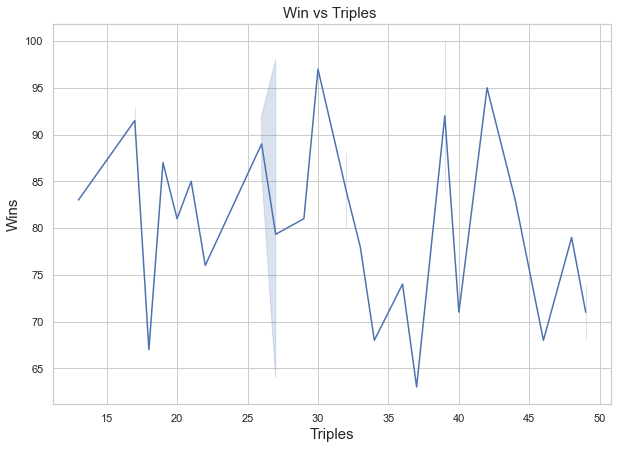

In [31]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='3B', y='W')
plt.title('Win vs Triples ', fontsize=15)
plt.xlabel('Triples', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

Here we can see Tiple is not having a linaer relation with Wins.  
At some points wins increasing with increase in number of triples.  
Near about 49 we can see the numbers are considerably low as compared to max number of Triples. 

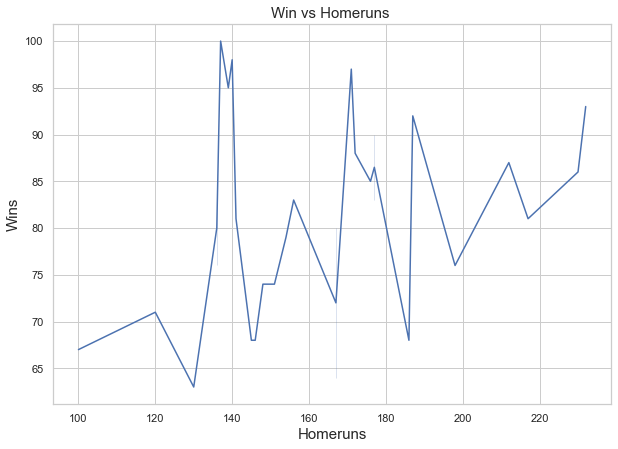

In [32]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='HR', y='W')
plt.title('Win vs Homeruns ', fontsize=15)
plt.xlabel('Homeruns', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

From graph we can observe that at point near homeruns- 135 , we have maximun number of wins.  
After 140 the graph is declining and from 160 to 200 showing good corelaion.  
Homerun having good corelation with Wins as compared to other variables. 

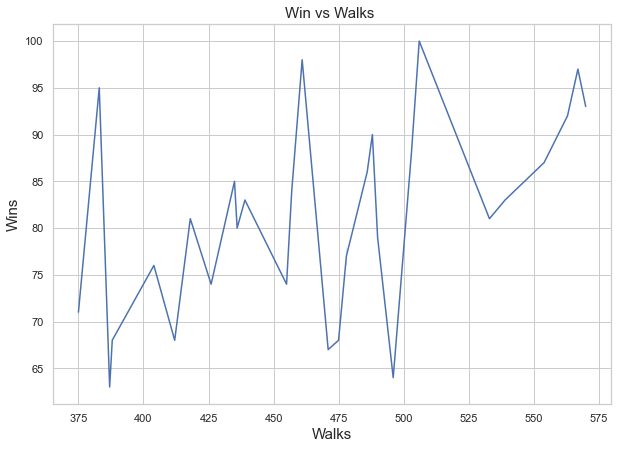

In [33]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='BB', y='W')
plt.title('Win vs Walks ', fontsize=15)
plt.xlabel('Walks', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

Wins and Walks graphs shows a positve linear realionship.  
We have maximum number of wins near 505  walks  

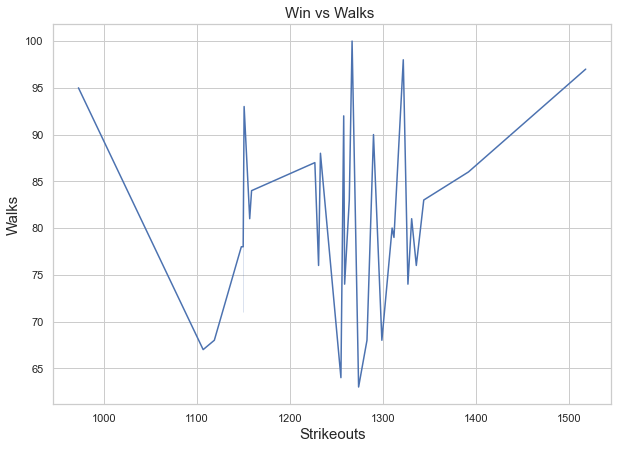

In [34]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='SO', y='W')
plt.title('Win vs Walks ', fontsize=15)
plt.xlabel('Strikeouts', fontsize=15)
plt.ylabel('Walks',fontsize=15)
plt.show()

initialy the Graph is showing very neagtive relation, after that overall it is having positive relation with wins.  
Maximum number of wins is between 1250 to 1300.  


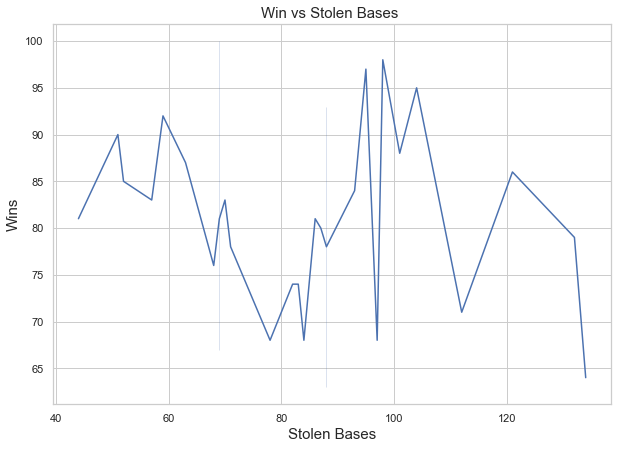

In [35]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='SB', y='W')
plt.title('Win vs Stolen Bases ', fontsize=15)
plt.xlabel('Stolen Bases', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

We can see Stolen bases having negative relationship with the Wins.  
with increase in number of Stolen Bases Number of wins also decreasing.  

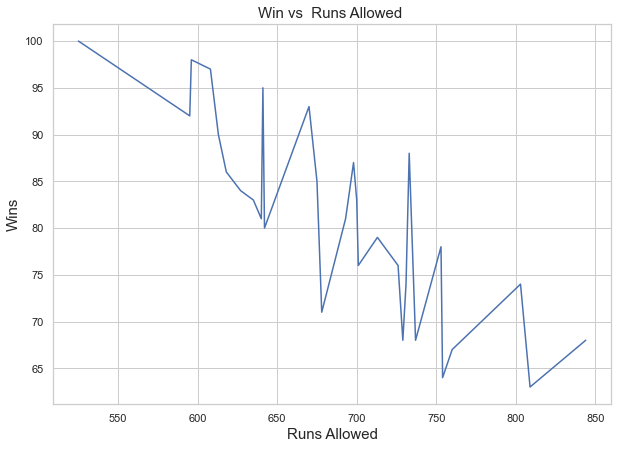

In [36]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='RA', y='W')
plt.title('Win vs  Runs Allowed ', fontsize=15)
plt.xlabel('Runs Allowed', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

Here we can see negative relationship between RA and W.  

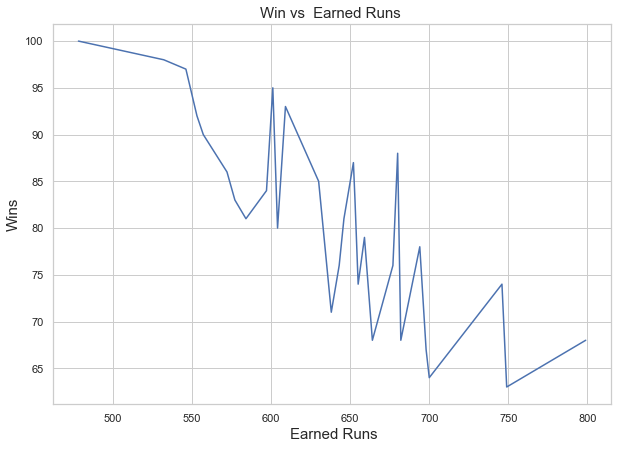

In [37]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='ER', y='W')
plt.title('Win vs  Earned Runs ', fontsize=15)
plt.xlabel(' Earned Runs', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

Here alsowe can see a lineraly negative relationshp between  ER and W.   
The treads are almost same as RA lets check relation ship between RA and ER.

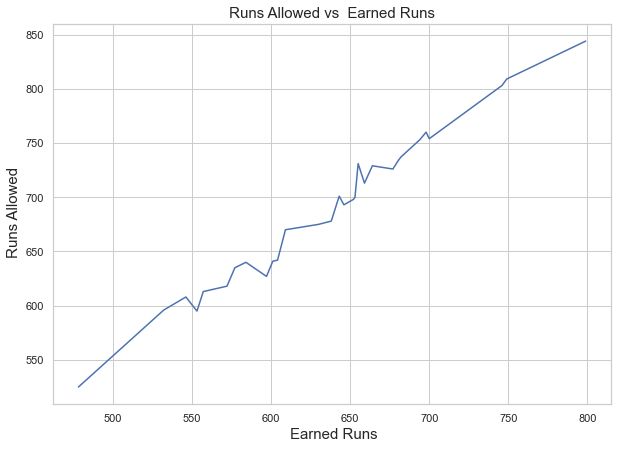

In [38]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='ER', y='RA')
plt.title(' Runs Allowed vs  Earned Runs ', fontsize=15)
plt.xlabel(' Earned Runs', fontsize=15)
plt.ylabel(' Runs Allowed',fontsize=15)
plt.show()

Here we can see very strong positive linear relationship between RA and ER,   
Both the columns are havig almost same effect of Wins, so we will merge them to make one later in the project.

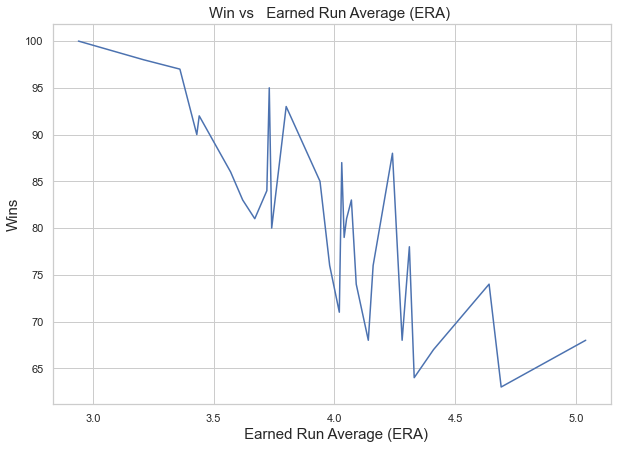

In [39]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='ERA', y='W')
plt.title('Win vs   Earned Run Average (ERA) ', fontsize=15)
plt.xlabel('  Earned Run Average (ERA)', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

ERA also having negative linear relationship withWins.   
Lets check corelation between ER 

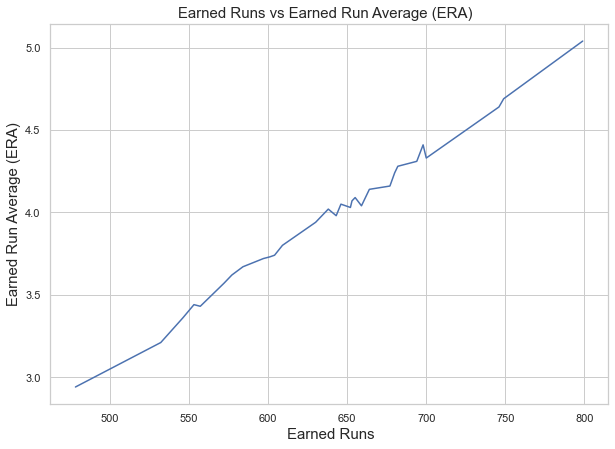

In [40]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='ER', y='ERA')
plt.title('Earned Runs vs Earned Run Average (ERA)  ', fontsize=15)
plt.xlabel(' Earned Runs', fontsize=15)
plt.ylabel('Earned Run Average (ERA)',fontsize=15)
plt.show()

Here we can see a very positive linear relationship between ER and ERA.  
It indicates data is having multi colinearity. 

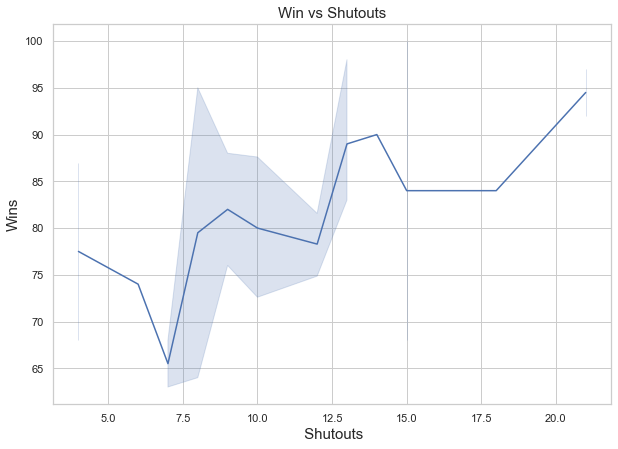

In [41]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='SHO', y='W')
plt.title('Win vs Shutouts', fontsize=15)
plt.xlabel(' Shutouts', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

We can see a positive linear relationship between W and SHO,  
Both the variable having good relationship. 

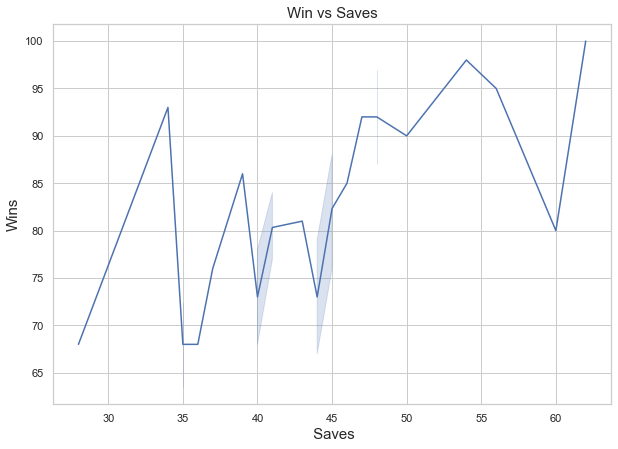

In [42]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='SV', y='W')
plt.title('Win vs Saves', fontsize=15)
plt.xlabel(' Saves', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

Here we can see a positive relation between Saves and Wins.  
Tha maximum values of wins is nearly 62.

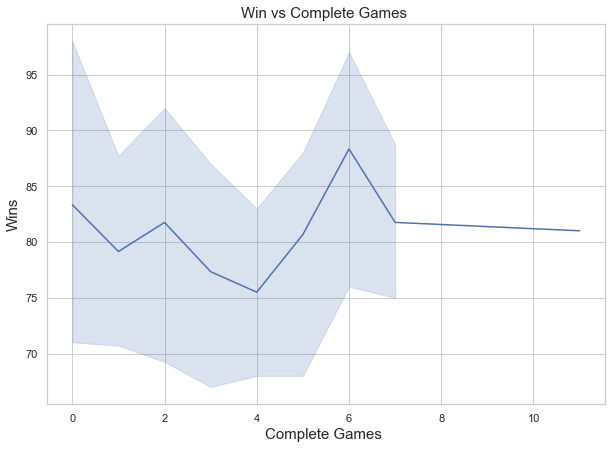

In [43]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='CG', y='W')
plt.title('Win vs Complete Games ', fontsize=15)
plt.xlabel('Complete Games ', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

We can see CG is not having good relationship with wins,  
Most of the values are lying between 0 to 7  

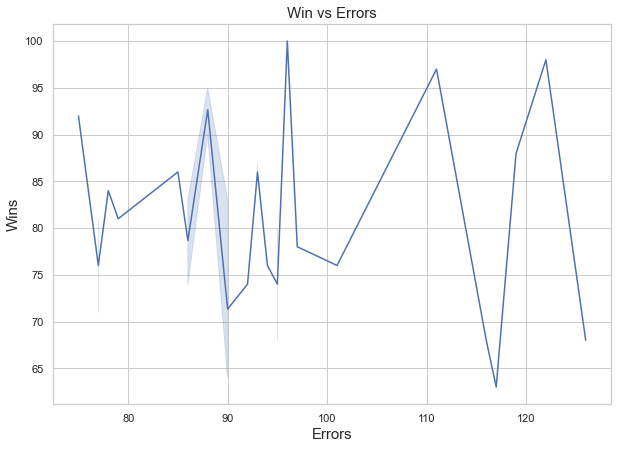

In [44]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='E', y='W')
plt.title('Win vs Errors', fontsize=15)
plt.xlabel('Errors', fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.show()

Here we can see Errors not having linear relation with Wins.

### Bivariate Aanlysis 

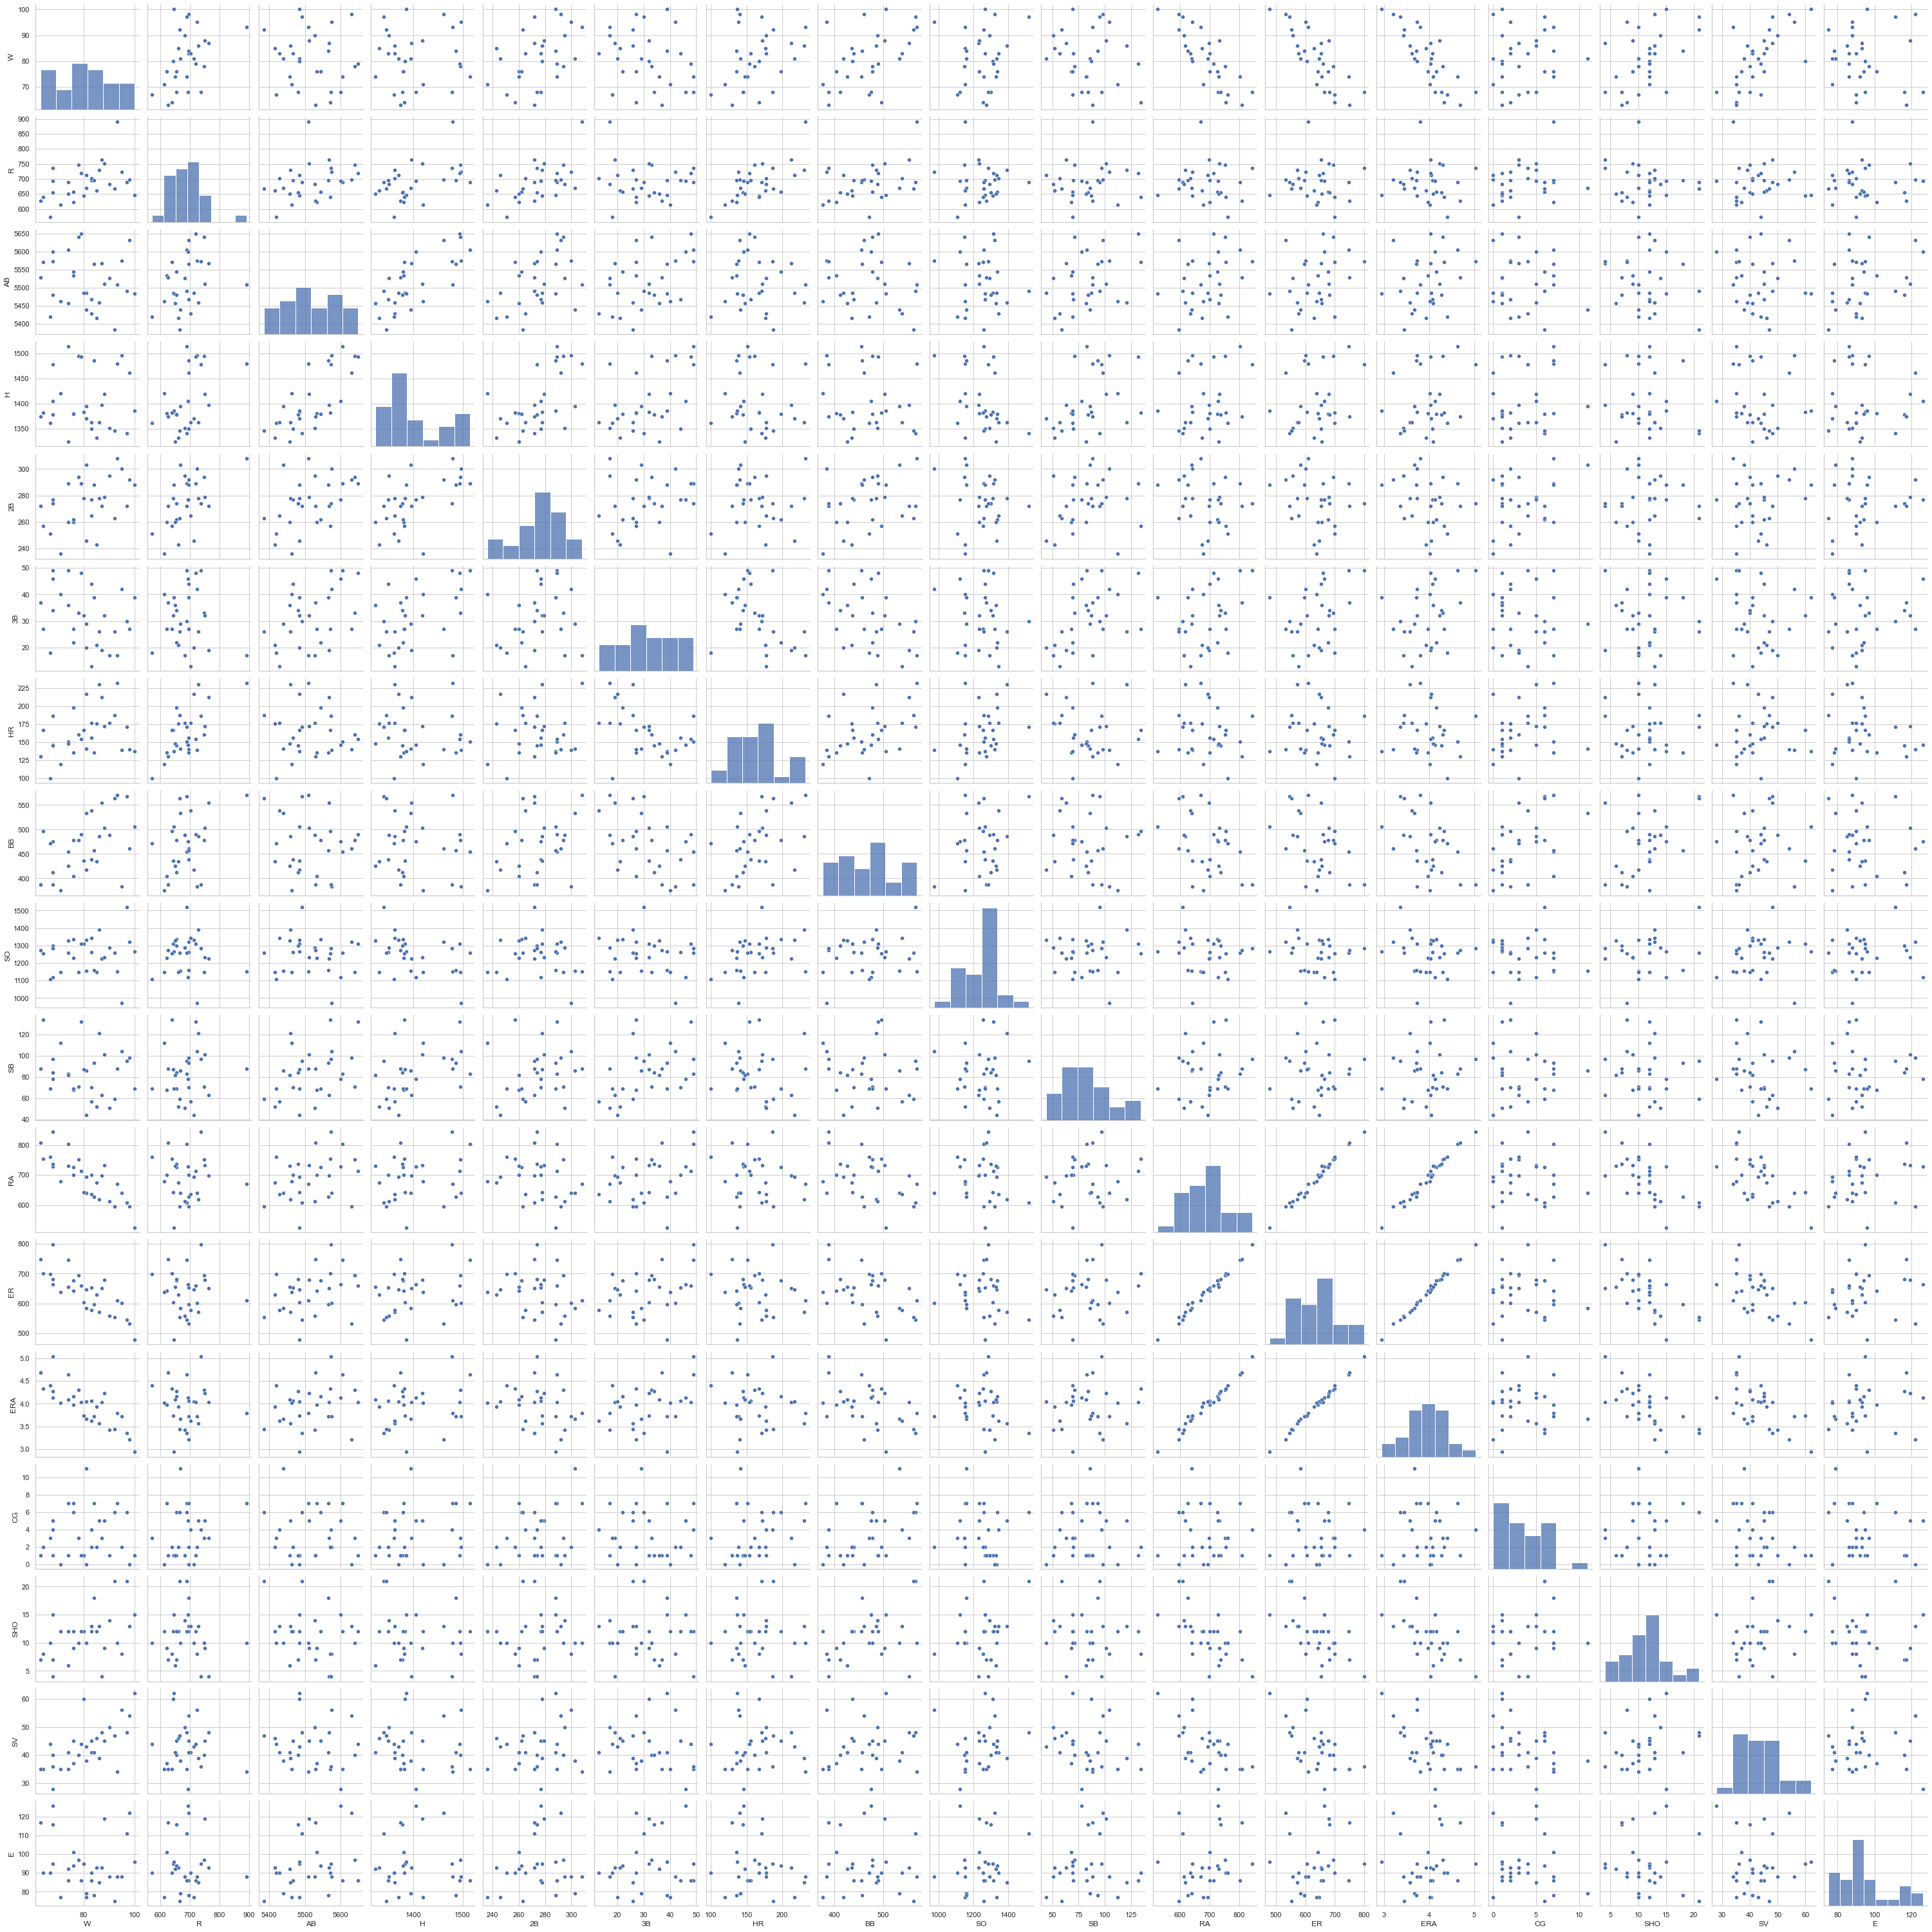

In [45]:
sns.pairplot(data)

### Data Preprocessing

In [46]:
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

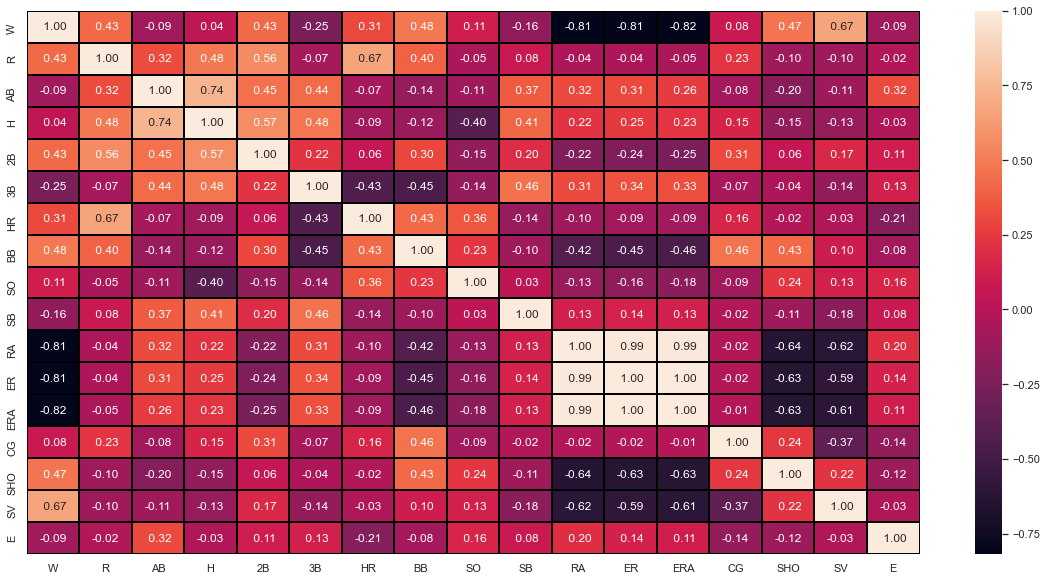

In [47]:
plt.figure(figsize=(20,10))

sns.heatmap(data.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

We can see most of the columns are havig neagtive correaltion and data also having multicollinearity present.  
Lets visualize for negative and positive correlation.

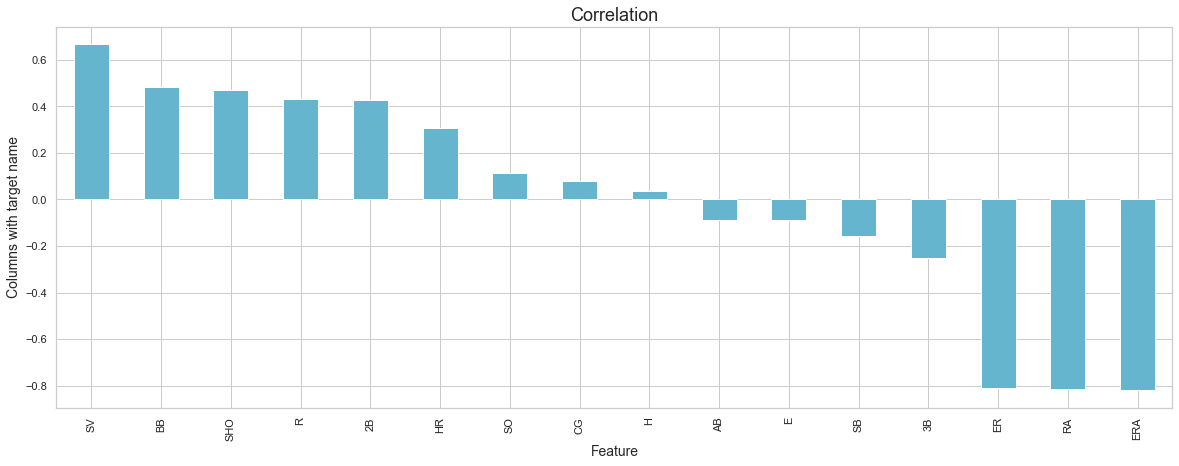

In [48]:
plt.figure(figsize=(20,7))
data.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we Can see SV, BB, SHO, R, 2B, HR, SO, CG and H all are having positive relationship with W.  
Other columns are features are having negative correltion.  
ER, RA and ERA are having almost equal correlation, multicollinearity present in these features.  

### Checking Outliers

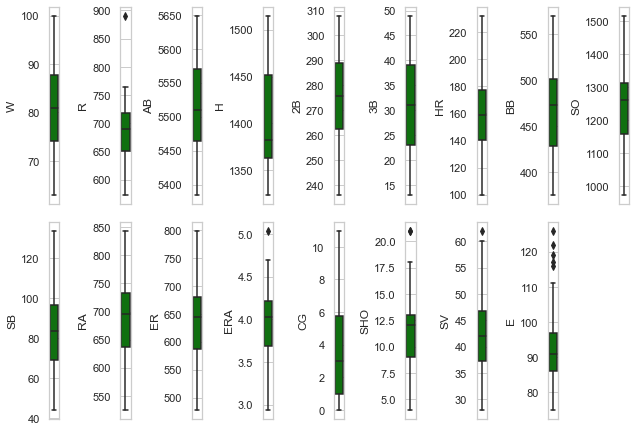

In [49]:
collist=data.columns.values
ncol= 9
nrows= 9

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=data[collist[i]], color='green', orient='x')
    plt.tight_layout()

 We can see R, ERA, SHO, SV and E  are having oulliers.

## Removing Outliers

In [50]:
from scipy.stats import zscore
z= np.abs(zscore(data))

In [51]:
threshold= 3 
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [52]:
df=data[(z<3).all(axis=1)]
print(data.shape)
print(df.shape)

(30, 17)
(29, 17)


In [53]:
Loss_percentage=(30-29)/30*100
print(Loss_percentage)

3.3333333333333335


# Removing skewness

In [54]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [55]:
df['H'] = np.sqrt( df['H'] )

In [56]:
df['SV'] = np.sqrt( df['SV'] )

In [57]:
df['E'] = np.sqrt( df['E'] )

In [58]:
df['CG'] = np.sqrt( df['CG'] )

# Scaling the data Using StandardScaler.

In [59]:
# Dividing into Feature and Target data
x=data.drop(['W'],axis=1)
y=data['W']

In [60]:
from sklearn.preprocessing import StandardScaler

SDC=StandardScaler()
x=SDC.fit_transform(x)

# Model Design

In [61]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [62]:
lr=LinearRegression()
for i in range(0, 100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    print(f"At Random Stat {i}, the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"At Random Stat {i}, the testing accuracy is:{r2_score(y_test,pred_test)}")
    print("\n")

At Random Stat 0, the training accuracy is:0.9609590618835543
At Random Stat 0, the testing accuracy is:0.6629341689506446


At Random Stat 1, the training accuracy is:0.9715846357165404
At Random Stat 1, the testing accuracy is:0.38417246900757474


At Random Stat 2, the training accuracy is:0.9898192153844542
At Random Stat 2, the testing accuracy is:-2.0819989550103877


At Random Stat 3, the training accuracy is:0.9722553885185528
At Random Stat 3, the testing accuracy is:0.46183789706024414


At Random Stat 4, the training accuracy is:0.9647461497996579
At Random Stat 4, the testing accuracy is:0.46606852927277453


At Random Stat 5, the training accuracy is:0.950309288736999
At Random Stat 5, the testing accuracy is:0.7517105066858121


At Random Stat 6, the training accuracy is:0.9489470045214469
At Random Stat 6, the testing accuracy is:0.8376419521868405


At Random Stat 7, the training accuracy is:0.9631978535911321
At Random Stat 7, the testing accuracy is:-0.255476941588827

At Random Stat 99, the training accuracy is:0.9531948414942485  
At Random Stat 99, the testing accuracy is:0.8804448045510335  

In [63]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.20, random_state= 99)

In [64]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print(r2_score(y_test_b,pred_test))

0.8804448045510335


linear Regression giving model accuracy = 0.8804448045510335 percent.

In next step we will perform cross validation of the model.

## Cross Validation of Model

In [65]:
test_accuracy= r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is -99.11855504647467 and Accuracy score is 88.04448045510334
At cross fold 3 the Cross Val score is 22.5884601677382 and Accuracy score is 88.04448045510334
At cross fold 4 the Cross Val score is 24.952166654370014 and Accuracy score is 88.04448045510334
At cross fold 5 the Cross Val score is 4.075540667455884 and Accuracy score is 88.04448045510334
At cross fold 6 the Cross Val score is 25.153530937186368 and Accuracy score is 88.04448045510334
At cross fold 7 the Cross Val score is 38.908046442894644 and Accuracy score is 88.04448045510334
At cross fold 8 the Cross Val score is 31.937022109667907 and Accuracy score is 88.04448045510334
At cross fold 9 the Cross Val score is -480.9084120395514 and Accuracy score is 88.04448045510334


At cross fold 7 the Cross Val score is 38.908046442894644 and Accuracy score is 88.04448045510334

In [66]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))

Error:
Mean Absolute Error: 3.630262588414302
Mean Squared Error: 16.19640800568361
Root Mean Square Error: 4.0244761156806


Model performance is very poor  
lets apply another Model 

# Lasso

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state': list(range(0,10)), 'selection':['cyclic', 'random'], 'max_iter':[500,1000,1200,1500,2000]}
ls=Lasso()
clf=GridSearchCV(ls, parameters)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'alpha': 1, 'max_iter': 500, 'random_state': 6, 'selection': 'random'}


In [68]:
ls=Lasso(alpha=1,max_iter=500, random_state=4, selection='random')
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=7)
lsc=rdscore.mean()
print('Cross val Score :', lsc*100)

R2 score: 91.85719573588686
Cross val Score : 56.67823309492429


In [69]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 3.1777066537721503
Mean Squared Error: 11.03123788779993
Root Mean Square Error: 3.321330740501453


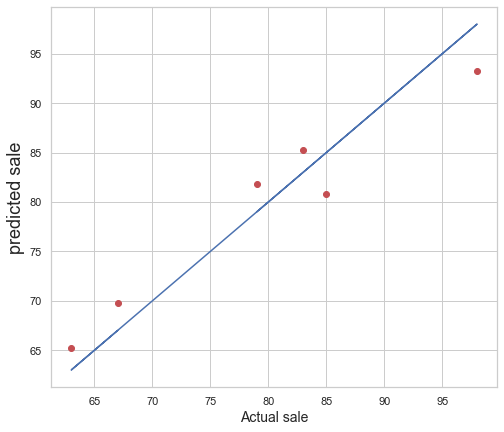

In [70]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

Cross val Score : 56.67823309492429 , still very big diffrence, Lets try another Model.

### 2. Ridge

In [71]:
parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'fit_intercept': [True,False], 'normalize':[True, False], 'copy_X': [True , False], 'tol':[0.0001,0.001,0.01,0.1,1,10]}
rd=Ridge()
rdclf=GridSearchCV(rd, parameters)
rdclf.fit(x_train_b, y_train_b)
print(rdclf.best_params_)

{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'tol': 0.0001}


In [72]:
rd= Ridge(alpha= 1, copy_X= True, fit_intercept= True, normalize= True, tol= 0.0001)
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=7)
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  82.12924891176066
Cross val Score 47.2649241771626


In [73]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 4.478179887094494
Mean Squared Error: 24.209903627039804
Root Mean Square Error: 4.920356046775457


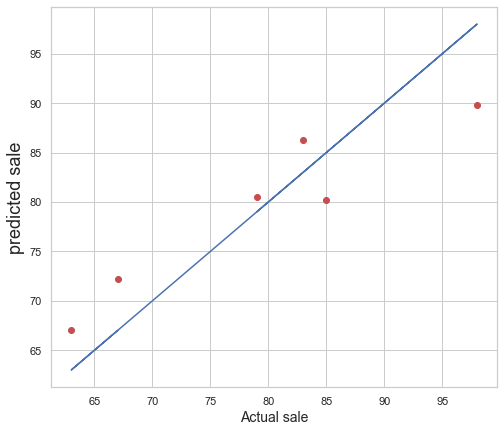

In [74]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

r2 score:  82.12924891176066  
Cross val Score 47.2649241771626  
Model performance is still very poor. Lets try another model.

## 3.DecisionTreeRegressor

In [75]:
parameters={'criterion':['mse','friedman_mse', 'mae', 'poisson'], 'splitter':['best', 'random'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],'max_features':['auto', 'sqrt', 'log2']}
dt=DecisionTreeRegressor()
dtclf= GridSearchCV(dt, parameters )
dtclf.fit(x_train_b, y_train_b)
print(dtclf.best_params_) 

{'criterion': 'poisson', 'max_depth': 50, 'max_features': 'log2', 'splitter': 'best'}


In [76]:
dt=DecisionTreeRegressor(criterion='mae',max_depth =50, max_features='log2',splitter='random')
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=7)
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 35.04203403731804
Cross Val Score: -25.918640599020225


In [77]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 8.0
Mean Squared Error: 88.0
Root Mean Square Error: 9.38083151964686


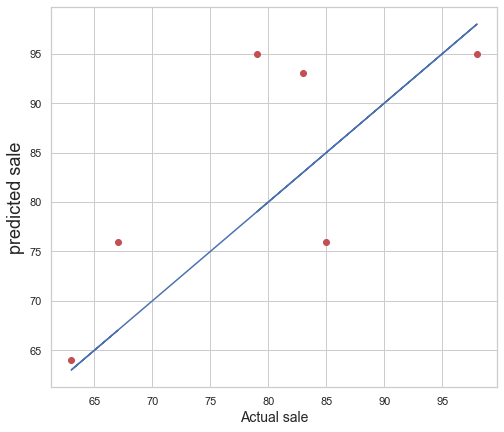

In [78]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

Model performance is very poor, lets try another model 

# 4. KNeighborsRegressor

In [79]:
parameters={'n_neighbors':[1,2,3,5,6,7,8,9,10,15],'weights':['uniform', 'distance'], 'algorithm':['auto','ball_tree','kd_tree'],'leaf_size':[10,20,30,40,50] }
kn=KNeighborsRegressor()
knclf=GridSearchCV(kn,parameters)
knclf.fit(x_train_b, y_train_b)
print(knclf.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}


In [80]:
kn=KNeighborsRegressor(algorithm='auto', n_neighbors=5, weights='uniform', leaf_size=10)
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score: 0', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=7, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 0 73.73631330736107
Cross val Score : 15.711680139152543


In [81]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 5.36666666666667
Mean Squared Error: 35.58000000000003
Root Mean Square Error: 5.964897316802698


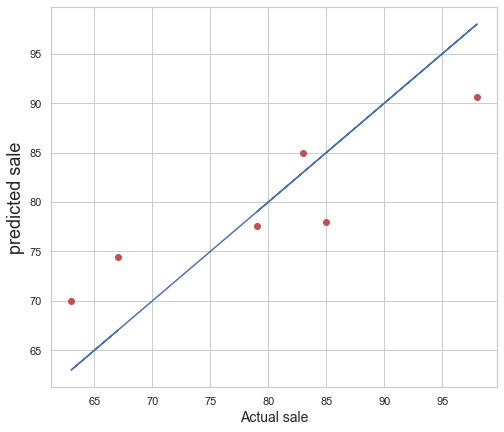

In [82]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 Score: 0 73.73631330736107  
Cross val Score : 15.711680139152543  
Model performance is still poor, Lets try  another.

# 5. Ensemble Techniques

In [83]:
parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[50,75,100,125,150,175]}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, parameters)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 75}


In [84]:
rf=RandomForestRegressor(criterion='mse', max_features='log2', n_estimators=150)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=7, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 73.5885886132185
Cross val Score : 12.916594864236766


In [85]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 5.1433333333333335
Mean Squared Error: 35.78012592592594
Root Mean Square Error: 5.9816490975253584


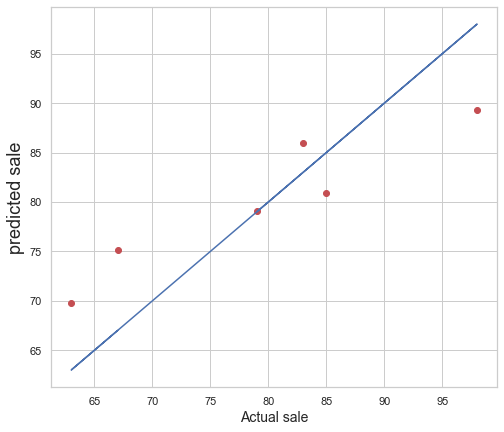

In [86]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

Here we can see, R2 score: 77.61509671245986 and Cross val Score : 11.963182966278865 having big difrence, our model still very poor.

## 6.GradientBoostingRegressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls', 'lad', 'huber', 'quantile'],'criterion':['friedman_mse', 'mse', 'mae'], 'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10, 30, 40, 50,60, 100]}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, parameters)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'mae', 'learning_rate': 0.1, 'loss': 'lad', 'n_estimators': 10}


In [88]:
gb=GradientBoostingRegressor(criterion='mae', loss='lad',learning_rate=0.1, n_estimators=10 )
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=7, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 73.5885886132185
Cross val Score : -3.845591312482794


In [89]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 5.1433333333333335
Mean Squared Error: 35.78012592592594
Root Mean Square Error: 5.9816490975253584


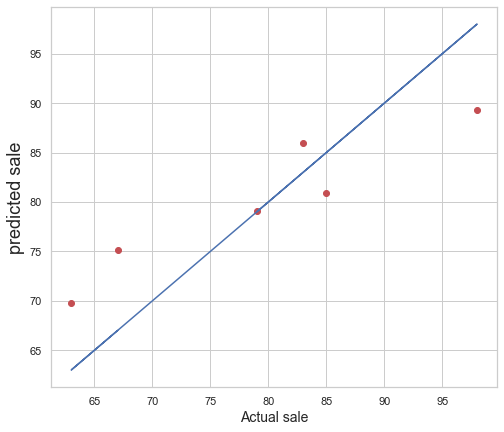

In [90]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= gb_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 score: 77.61509671245986  
Cross val Score : 3.077467054228587  
    
We can see big differnce in Cv score and R2 score, model performance is very poor.

r2 score:  82.12924891176066
Cross val Score 47.2649241771626

## We can see Ridge Having less diffrence in R2 score and Cross Val Score. we can consider this our best model.

## Saving Best Model

In [91]:
import pickle
filename='Baseball_case_study.pkl'
pickle.dump(rd,open(filename,'wb'))

In [92]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rd.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,67,72.208052
1,63,67.020752
2,98,89.835186
3,85,80.242806
4,83,86.237503
5,79,80.480764


We can see the both Original and pridicted Output.